# Copas del Mundo

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_partidos = pd.read_excel('DataSets/Copas_Del_Mundo.xlsx', 'WorldCupMatches')
print(df_partidos.columns)

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')


In [119]:
df_mundiales = pd.read_excel('DataSets/Copas_Del_Mundo.xlsx', 'WorldCups')
print(df_mundiales.columns)

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')


Veamos que campos tenemos, cantidad de registros y si hay valores nulos

In [120]:
df_mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            20 non-null     int64  
 1   Country         20 non-null     object 
 2   Winner          20 non-null     object 
 3   Runners-Up      20 non-null     object 
 4   Third           20 non-null     object 
 5   Fourth          20 non-null     object 
 6   GoalsScored     20 non-null     int64  
 7   QualifiedTeams  20 non-null     int64  
 8   MatchesPlayed   20 non-null     int64  
 9   Attendance      20 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ KB


In [121]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         852 non-null    int64         
 1   Date         852 non-null    datetime64[ns]
 2   Time         852 non-null    object        
 3   Round        852 non-null    object        
 4   Stadium      852 non-null    object        
 5   City         852 non-null    object        
 6   Country      852 non-null    object        
 7   HomeTeam     852 non-null    object        
 8   HomeGoals    852 non-null    int64         
 9   AwayGoals    852 non-null    int64         
 10  AwayTeam     852 non-null    object        
 11  Observation  852 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 80.0+ KB


In [122]:
df_mundiales.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.682531e+06
std,25.582889,32.972836,7.268352,17.218717,1.311515e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+02
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+02
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [123]:
df_partidos.describe()

,Year,HomeGoals,AwayGoals
count,852.000000,852.000000,852.000000
mean,1985.089202,1.811033,1.022300
std,22.448825,1.610255,1.087573
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,2.000000,1.000000
75%,2002.000000,3.000000,2.000000
max,2014.000000,10.000000,7.000000


In [124]:
df_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


## ¿Cuál es el pais que mas veces salió campeón?

In [125]:
df_mundiales.Winner.value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

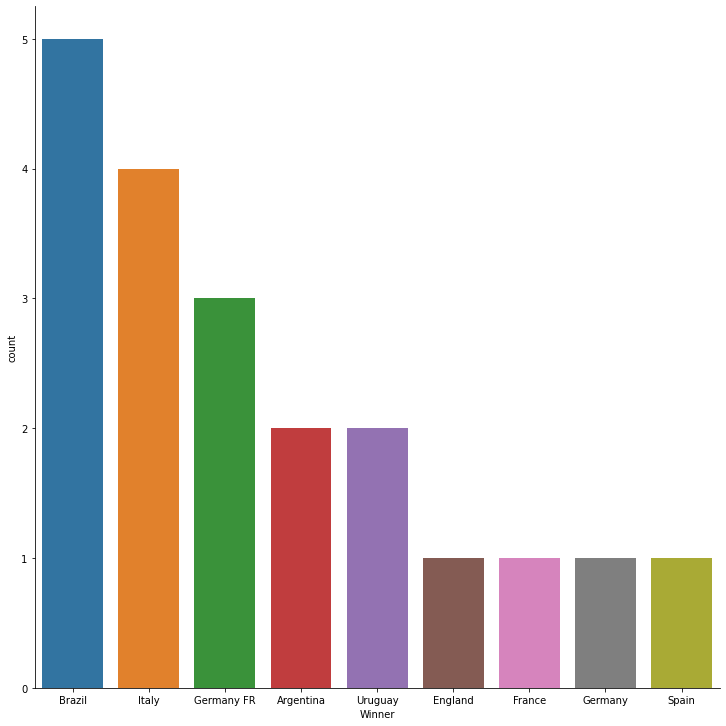

In [126]:
order = df_mundiales.groupby(["Winner"])["Winner"].count().sort_values(ascending=False).index
sns.catplot(x='Winner', data=df_mundiales, kind="count", height=10, order=order)
plt.show()

## ¿Que país es el que más partidos ganó? ¿Es sencillo calcularlo o debemos hacer alguna transformacion en los datos?

In [127]:
df_partidos.head()

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,


In [128]:
def obtenerGanador(pais1, pais2, goles1, goles2):
    if (goles1 > goles2):
        return pais1
    else:
        if (goles2 > goles1):
            return pais2
        else:
            return 'Empate'

In [129]:
df_partidos['Ganador'] = df_partidos.apply(lambda row: obtenerGanador(row['HomeTeam'], row['AwayTeam'], row['HomeGoals'],row['AwayGoals']), axis=1)

In [130]:
df_partidos.Ganador.value_counts()

Empate                    190
Brazil                     71
Italy                      45
Argentina                  44
Germany FR                 36
                         ... 
Slovenia                    1
Cuba                        1
Serbia                      1
Slovakia                    1
Bosnia and Herzegovina      1
Name: Ganador, Length: 65, dtype: int64

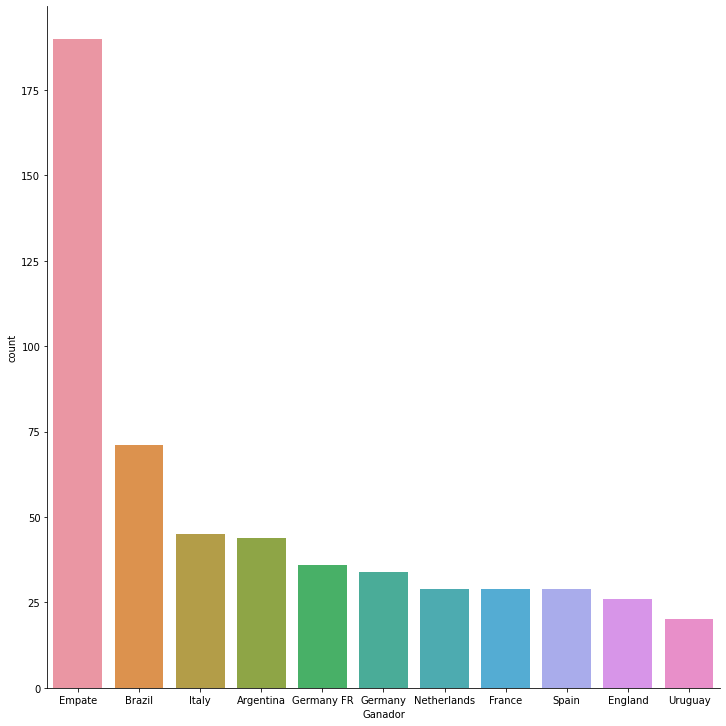

In [131]:
order = df_partidos.groupby(["Ganador"])["Ganador"].count().sort_values(ascending=False).index[0:11]
sns.catplot(x='Ganador', data=df_partidos[df_partidos['Ganador'].isin(order.to_list())], kind="count", height=10, order=order)
plt.show()

## ¿Qué país es el que más goles hizo?

In [138]:
df_1 = df_partidos[['HomeTeam','HomeGoals']].rename(columns={"HomeTeam": "Equipo", "HomeGoals": "Goles"})

In [139]:
df_2 = df_partidos[['AwayTeam','AwayGoals']].rename(columns={"AwayTeam": "Equipo", "AwayGoals": "Goles"})

In [140]:
df_partidos_equipos = pd.concat([df_1, df_2], axis = 0)

In [141]:
df_partidos_equipos.Equipo.unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'United Arab Emirates',
       'Costa Rica', 'Cameroon', 'Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'Trinidad and Tobago',
       'Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "Cï¿½te d'Ivoire", 'Ghana', 'Ukraine', 

In [142]:
df_partidos_equipos.pivot_table(index='Equipo', values=['Goles'], aggfunc=np.sum).sort_values(by='Goles', ascending=False).head(10)

,Goles
Equipo,
Brazil,225
Argentina,133
Germany FR,131
Italy,128
France,108
Germany,104
Spain,92
Netherlands,91
Hungary,87


## ¿Cuál es el resultado más frecuente en mundiales?

In [160]:
df_empates = df_partidos[['HomeGoals','AwayGoals']][(df_partidos['HomeGoals'] == df_partidos['AwayGoals'])]

In [161]:
df_no_empates1 = df_partidos[['HomeGoals','AwayGoals']][(df_partidos['HomeGoals'] < df_partidos['AwayGoals'])]

In [162]:
df_no_empates2 = df_partidos[['AwayGoals','HomeGoals']][(df_partidos['HomeGoals'] > df_partidos['AwayGoals'])]

In [163]:
df_empates.rename(columns={"HomeGoals": "Marcador1", "AwayGoals": "Marcador2"}, inplace=True)

In [164]:
df_no_empates1.rename(columns={"HomeGoals": "Marcador1", "AwayGoals": "Marcador2"}, inplace=True)

In [165]:
df_no_empates2.rename(columns={"AwayGoals": "Marcador1", "HomeGoals": "Marcador2"}, inplace=True)

In [166]:
df_marcadores = pd.concat([df_empates, df_no_empates1, df_no_empates2], axis=0)

In [167]:
df_marcadores['Marcador1'] = df_marcadores['Marcador1'].astype(str)

In [168]:
df_marcadores['Marcador2'] = df_marcadores['Marcador2'].astype(str)

In [169]:
df_marcadores['Marcador'] = df_marcadores.apply(lambda row: row['Marcador1'] + '-' + row['Marcador2'], axis=1)

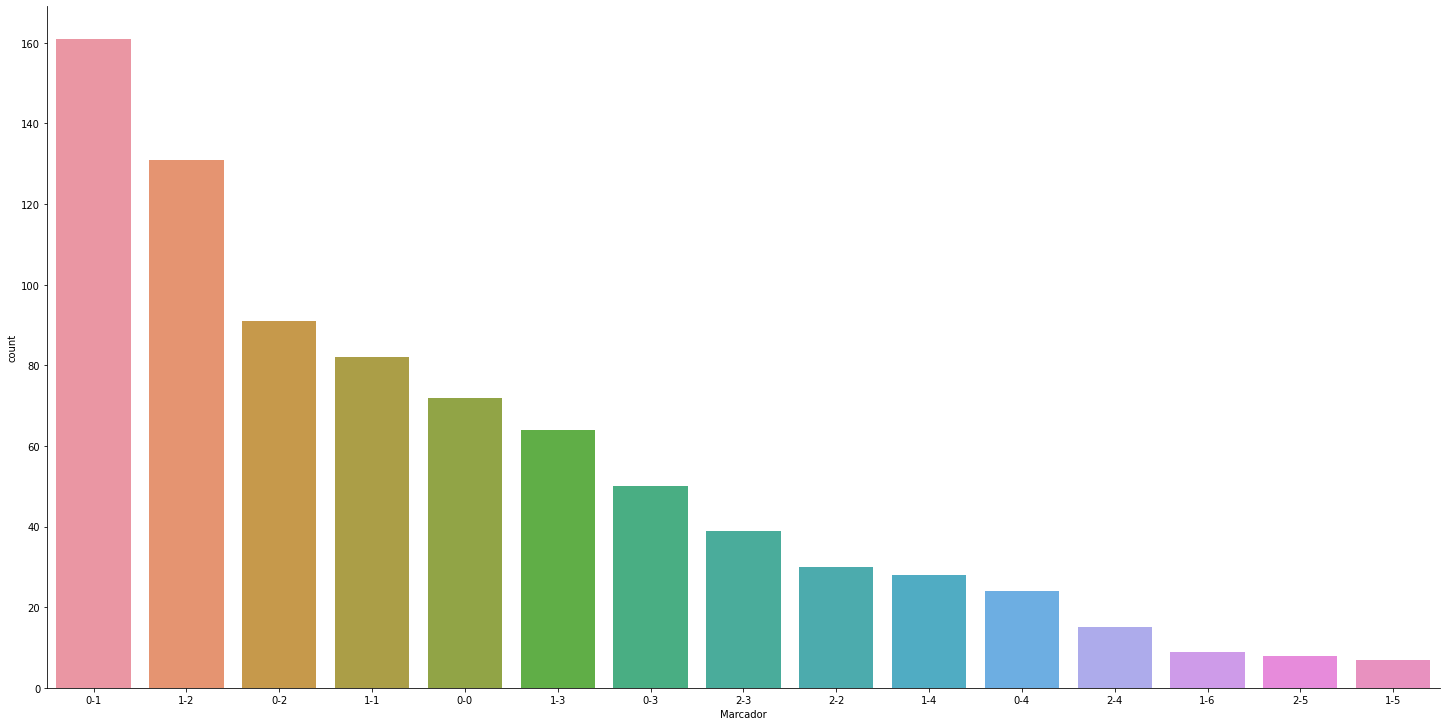

In [170]:
order = df_marcadores.groupby(["Marcador"])["Marcador"].count().sort_values(ascending=False).index[0:15]
sns.catplot(x='Marcador', data=df_marcadores[df_marcadores['Marcador'].isin(order.to_list())], kind="count", height=10, aspect=2/1, order=order)
plt.show()